AxesImage(54,36;334.8x217.44)


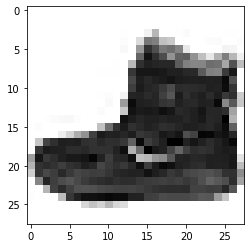

(10000, 28, 28)

In [17]:
#Deep learning model for identifying images in Fashion MNIST data
#There are 10 categories of items,each assigned a value 0-9
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras import backend as K
import numpy as np
import pickle
import matplotlib.pyplot as plt
#Opening files for reading the data
fileObjectx = open('trainX.pickle','rb')
fileObjecty = open('trainY.pickle','rb')
fileObjectX = open('testX.pickle','rb')

# load the object from the files
trainX= pickle.load(fileObjectx)  
print(plt.imshow(trainX[0],cmap=plt.cm.binary))
plt.show()
trainX.shape
trainY= pickle.load(fileObjecty)
trainY.shape
testX_retrive= pickle.load(fileObjectX)

testX_retrive.shape


In [2]:
#Splitting the data into training data and testing data

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(trainX,trainY,random_state=1)


In [7]:
print(X_test.shape)
print(y_test.shape)

(15000, 28, 28)
(15000,)


In [8]:
#Parameters for training the model

#number of training examples utilized in one iteration
batch_size = 512

#number of classes of the output
num_classes = 10

#number of times the model loop through data for training
epochs = 100

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train shape: (45000, 28, 28)
45000 train samples
15000 test samples


In [10]:
X_train = np.reshape(X_train, (45000, 784))
X_test = np.reshape(X_test, (15000, 784))

#data for which prediction is to be made
testX=np.reshape(testX_retrive,(10000,784))

X_train.shape

(45000, 784)

In [11]:
#Using Sequential model
model = Sequential()
model.add(Dense(500, input_dim=784), )
# Activation function-Rectified Linear Unit,returns 0 if it founds a negative value and the value x for positive value 
model.add(Activation('relu'))

#Using Dropout to stop overfitting
model.add(Dropout(0.4))
model.add(Dense(300))
model.add(Activation('relu'))

#Using Dropout to stop overfitting
model.add(Dropout(0.4))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

#Adadelta optimizer continues learning even when many updates have been done
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

W0623 18:05:07.933402  2392 deprecation_wrapper.py:119] From E:\anaconda\envs\assignment3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0623 18:05:07.954346  2392 deprecation_wrapper.py:119] From E:\anaconda\envs\assignment3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0623 18:05:07.957338  2392 deprecation_wrapper.py:119] From E:\anaconda\envs\assignment3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0623 18:05:07.974293  2392 deprecation_wrapper.py:119] From E:\anaconda\envs\assignment3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0623 18:05:07.983269  2392 de

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               150300    
_________________________________________________________________
activation_2 (Activation)    (None, 300)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3010      
__________

In [12]:
#set early stopping monitor so the model stops training when it won't improve anymore
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=5)

#Train model
hist=model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test),callbacks=[early_stopping_monitor])

#loss and accuracy returnedfrom evaluate function
loss,accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy*100,'%')

W0623 18:05:13.381488  2392 deprecation.py:323] From E:\anaconda\envs\assignment3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 45000 samples, validate on 15000 samples
Epoch 1/100
45000/45000 [==============================] - 6s 123us/step - loss: 0.8737 - acc: 0.6894 - val_loss: 0.5630 - val_acc: 0.7928
Epoch 2/100
45000/45000 [==============================] - 5s 111us/step - loss: 0.5606 - acc: 0.7978 - val_loss: 0.4676 - val_acc: 0.8286
Epoch 3/100
45000/45000 [==============================] - 5s 109us/step - loss: 0.4931 - acc: 0.8214 - val_loss: 0.4150 - val_acc: 0.8473
Epoch 4/100
45000/45000 [==============================] - 5s 117us/step - loss: 0.4461 - acc: 0.8379 - val_loss: 0.3793 - val_acc: 0.8633
Epoch 5/100
45000/45000 [==============================] - 5s 110us/step - loss: 0.4283 - acc: 0.8426 - val_loss: 0.3773 - val_acc: 0.8599
Epoch 6/100
45000/45000 [==============================] - 5s 104us/step - loss: 0.4007 - acc: 0.8540 - val_loss: 0.3699 - val_acc: 0.8653
Epoch 7/100
45000/45000 [==============================] - 5s 109us/step - loss: 0.3896 - acc: 0.8552 - val_loss: 0.

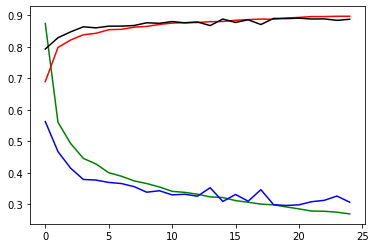

3
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [20]:
#Plotting the loss ,acc,val_loss and val_acc
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.plot(hist.history['acc'],'r')
plt.plot(hist.history['val_acc'],'black')

plt.show()


#Predicting for the test data
pred=model.predict(X_test)
test_result=np.argmax(pred[0])
print(test_result)

#Saving the model 
model.save('apparels_image_reader.model')

#loading the saved model for prediction 
new_model=keras.models.load_model('apparels_image_reader.model')

#Prediction on the new data
prediction=new_model.predict(testX)
#print(prediction)


In [16]:
#Storing the predictions in a pickle file named result.
filename = 'result.pickle'
outfile = open(filename,'wb')
pickle.dump(prediction,outfile)
outfile.close()

